Task 1. Write a Python function that converts a temperature from Fahrenheit to Celsius. Use numpy.vectorize to apply this function to an array of temperatures: [32, 68, 100, 212, 77].

Formula:
$$
C=(F−32)×5/9
$$

In [1]:
import numpy as np
@np.vectorize
def from_fahrenheit_to_celsius(x):
    return (x - 32) * 5/9
arr1 = np.array([32, 68, 100, 212, 77])
print(from_fahrenheit_to_celsius(arr1))

[  0.          20.          37.77777778 100.          25.        ]


Task 2. Create a custom function that takes two arguments: a number and a power. Use numpy.vectorize to calculate the power for each pair of numbers in two arrays: [2, 3, 4, 5] and [1, 2, 3, 4].

In [2]:
@np.vectorize
def power(base, exp):
    return base ** exp
base_arr = [2, 3, 4, 5]
exp_arr = [1, 2, 3, 4]
print(power(base_arr, exp_arr))

[  2   9  64 625]


Task 3. Solve the system of equations using numpy:
$
\begin{cases}
4x+5y+6z=7\\
3x−y+z=4\\
2x+y−2z=5
\end{cases}
$

In [3]:
A = np.array([[4, 5, 6],
                  [3, -1, 1],
                  [2, 1, -2]])
b = np.array([7, 4, 5])
print(np.linalg.solve(A, b))

[ 1.7027027   0.62162162 -0.48648649]


Task 4. Given the electrical circuit equations below, solve for \\( I_1, I_2, I_3\\) (currents in the branches):
$$
\begin{cases}
10I_1 - 2I_2 + 3I_3 = 12 \\
-2I_1 + 8I_2 -I_3= - 5 \\
3I_1 -I_2 + 6I_3 = 15
\end{cases}
$$

In [4]:
W = np.array([[10, -2, 3],
              [-2, 8, -3],
              [3, -1, 6]])
b = [12, -5, 15]
print(np.linalg.solve(W, b))

[0.5952381  0.37301587 2.26455026]


Image Manipulation with NumPy and PIL

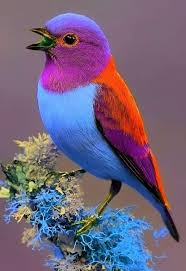

In [5]:
from PIL import Image
with Image.open('images/birds.jpg') as img:
    display(img)


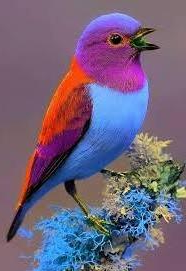

In [12]:
def save_image(save_img:Image, name='images/img1.jpg'):
    save_img.save(name)
def flip_horizontally(img1:str, name):
    with Image.open(img1) as image:
        flipped_image = image.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
        save_image(flipped_image, name)
        display(flipped_image)
flip_horizontally('images/flipped_horizontal.jpg', 'images/flipped_horizontal.jpg')

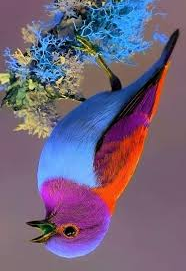

In [13]:
def flip_vertically(img1:str, name:str):
    with Image.open(img1) as image:
        flipped_image = image.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
        save_image(flipped_image, name)
        display(flipped_image)
flip_vertically('images/birds.jpg', 'images/flipped_vertical.jpg')

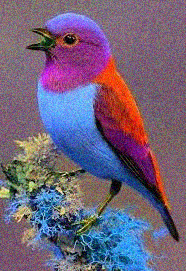

In [14]:
from numpy import int16


def add_random_noise(image:str, name=""):
    with Image.open(image) as im:
        img_array = np.array(im)
        noise = np.random.randint(-30, 30, img_array.shape, dtype=int16)
        noisy_img_arr = np.clip(img_array + noise, 0, 255).astype(np.uint8)
        noisy_img = Image.fromarray(noisy_img_arr)
        save_image(noisy_img, name)
        display(noisy_img)
add_random_noise('images/birds.jpg', 'images/noisy_image_birds.jpg')

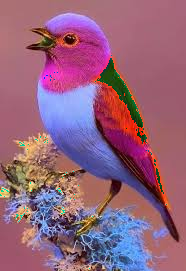

In [17]:
def brighten_image(image:str, name:str):
    with Image.open(image) as im:
        img_array = np.array(im)
        brightened_img_array = img_array
        brightened_img_array[:, :, 0] = np.clip(img_array[:,:,0]+40, 0, 255)
        brightened_img = Image.fromarray(brightened_img_array)
        display(brightened_img)
        save_image(brightened_img, name)
brighten_image('images/birds.jpg', 'images/brightened_image.jpg')

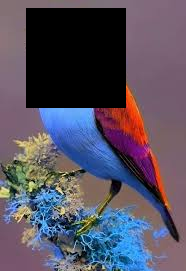

In [21]:
def mask_area(image:str):
    with Image.open(image) as im:
        img_array = np.array(im)
        shape = np.shape(img_array)
        a1 = np.random.randint(0, shape[0]-100)
        b1 = np.random.randint(0, shape[1]-100)
        img_array[a1:a1+100, b1:b1+100] = [0, 0, 0]
        masked_img = Image.fromarray(img_array)
        display(masked_img)

mask_area('images/birds.jpg')